In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit_card_transactions.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


### 📊 Feature Descriptions

* **`trans_date_trans_time`**: Timestamp of the transaction.
* **`cc_num`**: Credit card number (encrypted).
* **`merchant`**: The store or vendor where the transaction occurred.
* **`category`**: Transaction category (e.g., groceries, entertainment).
* **`amt`**: Transaction amount.
* **`first`**: Cardholder's first name.
* **`last`**: Cardholder's last name.
* **`gender`**: Cardholder's gender.
* **`street`**: Street where the cardholder resides.
* **`city`**: City where the cardholder resides.
* **`state`**: State where the cardholder resides.
* **`zip`**: Postal code of the cardholder.
* **`lat`**: Latitude of the cardholder's address.
* **`long`**: Longitude of the cardholder's address.
* **`city_pop`**: Population of the city where the transaction occurred.
* **`job`**: Cardholder's occupation.
* **`dob`**: Cardholder's date of birth.
* **`trans_num`**: Unique transaction number.
* **`unix_time`**: Unix timestamp of the transaction.
* **`merch_lat`**: Latitude of the merchant's location.
* **`merch_long`**: Longitude of the merchant's location.
* **`is_fraud`**: Indicates whether the transaction is fraudulent. (**Target Feature**)
* **`merch_zipcode`**: Merchant's postal code.

#### Shape of the data

In [6]:
df.shape

(1296675, 24)

#### Data types:

In [8]:
data_types = pd.DataFrame(df.dtypes).reset_index()
data_types.columns = ['Feature Name', 'Data Type'] 
data_types

,Feature Name,Data Type
0,Unnamed: 0,int64
1,trans_date_trans_time,object
2,cc_num,int64
3,merchant,object
4,category,object
5,amt,float64
6,first,object
7,last,object
8,gender,object
9,street,object


#### Checking missing values in the data:

In [10]:
missing_counts = df.isnull().sum()
missing_counts_df = pd.DataFrame(missing_counts).reset_index()
missing_counts_df.columns = ['Feature', 'Missing Value Count']
missing_counts_df

,Feature,Missing Value Count
0,Unnamed: 0,0
1,trans_date_trans_time,0
2,cc_num,0
3,merchant,0
4,category,0
5,amt,0
6,first,0
7,last,0
8,gender,0
9,street,0


#### Number of unique values in each column:

In [12]:
unique_counts = df.nunique()
unique_counts_df = pd.DataFrame(unique_counts).reset_index()
unique_counts_df.columns = ['Feature', 'Number of Unique Values'] 
unique_counts_df

,Feature,Number of Unique Values
0,Unnamed: 0,1296675
1,trans_date_trans_time,1274791
2,cc_num,983
3,merchant,693
4,category,14
5,amt,52928
6,first,352
7,last,481
8,gender,2
9,street,983


## Visualization

#### Distribuiton of Data:

In [15]:
percentages = df["is_fraud"].value_counts(normalize=True) * 100
percentages

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

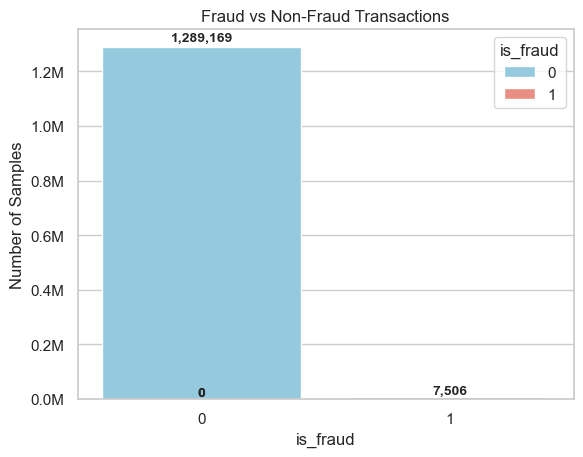

In [16]:
import matplotlib.ticker as mtick

sns.set(style="whitegrid")
ax = sns.countplot(x="is_fraud", data=df, palette=["skyblue", "salmon"], hue="is_fraud")

plt.title("Fraud vs Non-Fraud Transactions")
plt.ylabel("Number of Samples")

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + (0.01 * height),
        f'{height:,}',  # add commas for readability, e.g. 1,234,567
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )


plt.show()


#### Creating a new dataset with only 100K instances that contains all the is_fraud==1 instances from above dataset

In [18]:
total_samples = 100000

fraud_df = df[df["is_fraud"]==1]
nonfraud_df = df[df["is_fraud"]==0]

n_fraud = len(fraud_df)

n_nonfraud = total_samples - n_fraud

nonfraud_sample = nonfraud_df.sample(n = n_nonfraud, random_state = 42)

new_df = pd.concat([fraud_df,nonfraud_sample],axis = 0)

#shuffle the new(dataset)
new_df = new_df.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [19]:
new_df.shape

(100000, 24)

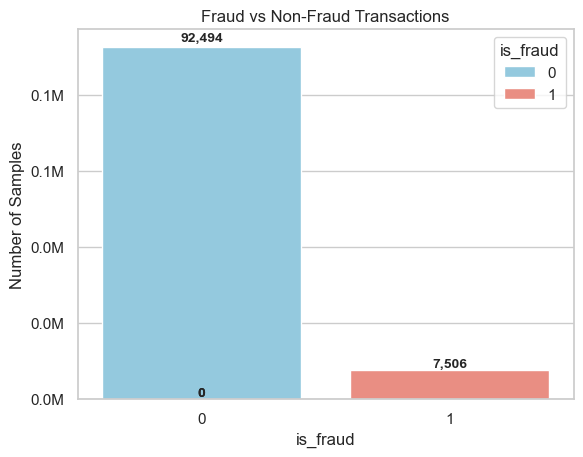

In [20]:
import matplotlib.ticker as mtick

sns.set(style="whitegrid")
ax = sns.countplot(x="is_fraud", data=new_df, palette=["skyblue", "salmon"], hue="is_fraud")

plt.title("Fraud vs Non-Fraud Transactions")
plt.ylabel("Number of Samples")

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + (0.01 * height),
        f'{height:,}',  # add commas for readability, e.g. 1,234,567
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )


plt.show()


### Visualization of fraud cases on the basis of features:

#### On the bsis of Gender:

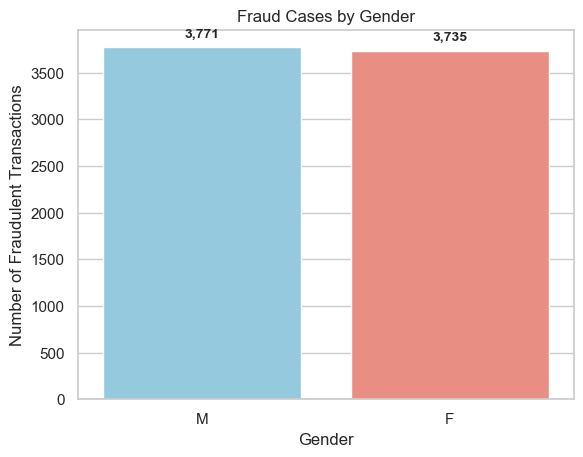

In [23]:

# Filter only fraud cases
fraud_df = df[df["is_fraud"] == 1]

sns.set_style("whitegrid")

# Plot fraud counts by gender (fixed warning + simple y-axis)
ax = sns.countplot(
    data=fraud_df,
    x="gender",
    hue="gender",          # for color palette support
    palette=["skyblue", "salmon"],
    legend=False
)

plt.title("Fraud Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Fraudulent Transactions")

# Add counts on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + (0.02 * height),
        f'{height:,}',  # comma-separated numbers, e.g. 7,532
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.show()


#### On the basis of Category:

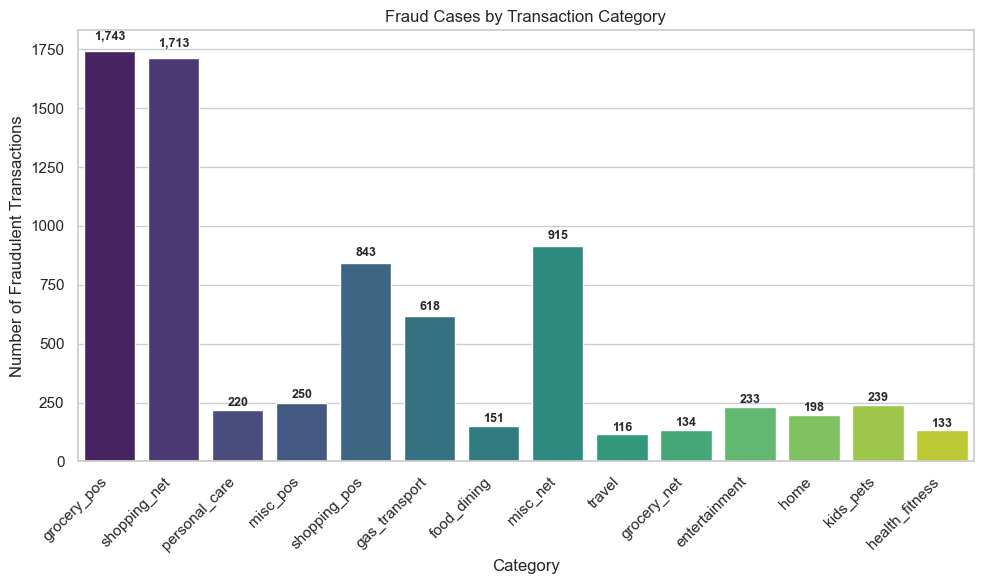

In [25]:

# Filter only fraud cases
fraud_df = new_df[new_df["is_fraud"] == 1]

sns.set_style("whitegrid")

# Plot fraud counts by category
plt.figure(figsize=(10, 6))  # make it wider if there are many categories
ax = sns.countplot(
    data=fraud_df,
    x="category",
    hue="category",           # to use palette safely
    palette="viridis",        # nice gradient color palette
    legend=False
)

plt.title("Fraud Cases by Transaction Category")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=45, ha="right")  # rotate labels for readability

# Add counts on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + (0.02 * height),
        f'{height:,}',  # formatted with commas
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


## Data Manipulation

#### 1. Dropping unnecessary columns:


* **`Unnamed: 0`**: It's a unique number similar to an index, which is meaningless for training purposes.
* **`first`**: The cardholder's first and last names are irrelevant for training purposes.
* **`last`**: The cardholder's first and last names are irrelevant for training purposes.
* **`street`**: Since we already have **`lat`** and **`lon`** information, we don't need the data in this column.
* **`city`**: Since we already have **`lat`** and **`lon`** information, we don't need the data in this column.
* **`cc_num`**: It’s a credit card number identifier, not a behavioral feature.
* **`zip`**: Since we already have **`lat`** and **`lon`** information, we don't need the data in this column.
* **`trans_num`**: It's a unique transaction identifier, which is meaningless for training purposes.
* **`unix_time`**: We can derive the same information from the **`trans_date_trans_time`** column.
* **`merch_zipcode`**: Since we already have **`lat`** and **`lon`** information, we don't need the data in this column.

In [29]:
cols_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time', 'zip', 'merch_zipcode', 'city']
new_df2 = new_df.drop(columns=cols_to_drop)

#total dropped columns = 10

#### 2. Removing Outliers

The only numerical value I can use for outlier detection is the transaction amount (amt). Other numerical values, such as population, latitude, longitude, etc., do not hold any meaningful statistical significance or distribution in this context.

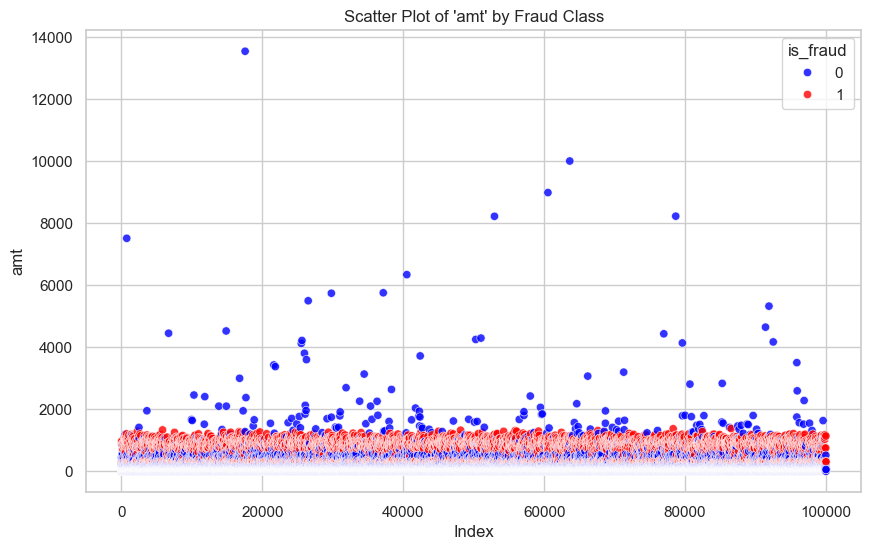

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=new_df2,
    x=new_df2.index,
    y='amt',
    hue='is_fraud',
    palette={0: 'blue', 1: 'red'},
    alpha=0.8
)

plt.title("Scatter Plot of 'amt' by Fraud Class")
plt.xlabel('Index')
plt.ylabel('amt')
plt.show()


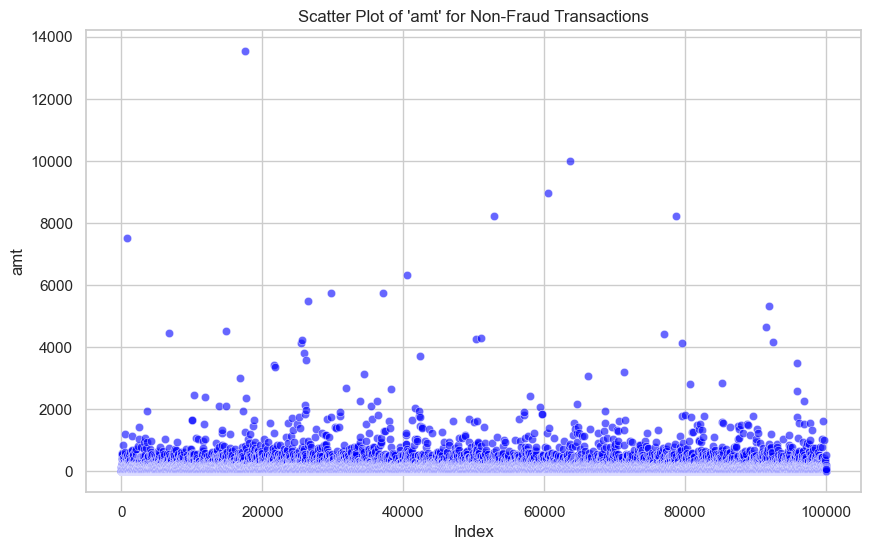

In [33]:

# Filter only non-fraud transactions
non_fraud_df = new_df2[new_df2["is_fraud"] == 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=non_fraud_df,
    x=non_fraud_df.index,
    y='amt',
    color='blue',        # only one class, so single color
    alpha=0.6
)

plt.title("Scatter Plot of 'amt' for Non-Fraud Transactions")
plt.xlabel('Index')
plt.ylabel('amt')
plt.show()


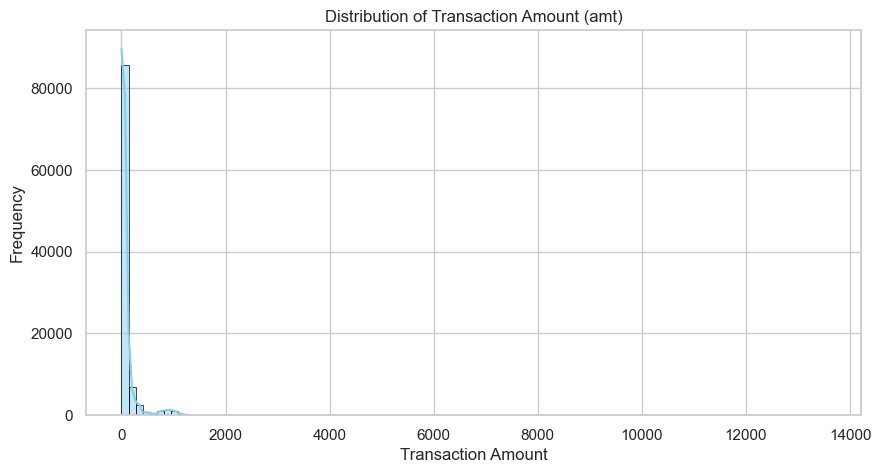

In [34]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(new_df2['amt'], bins=100, kde=True, color='skyblue', edgecolor = 'black')
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [35]:
temp_df = new_df2

In [36]:
# Calculate Q1, Q3 and IQR
Q1 = temp_df['amt'].quantile(0.25)
Q3 = temp_df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds (you can change 1.5 to 3 if you want to be less aggressive)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
temp_df = temp_df[(temp_df['amt'] >= lower_bound) & (temp_df['amt'] <= upper_bound)]



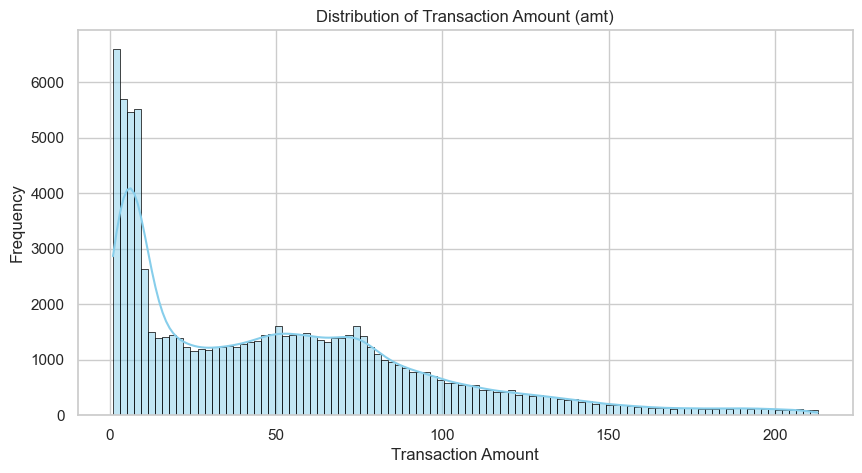

In [37]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(temp_df['amt'], bins=100, kde=True, color='skyblue', edgecolor = 'black')
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [38]:
temp_df.shape

(90986, 14)

In [39]:
new_df['is_fraud'].value_counts()

is_fraud
0    92494
1     7506
Name: count, dtype: int64

In [40]:
temp_df['is_fraud'].value_counts()

is_fraud
0    89177
1     1809
Name: count, dtype: int64

#### It removed most of the class = 1 samples, so removing outliers globally, is not appropriate since frauds usually occur at higher amounts.

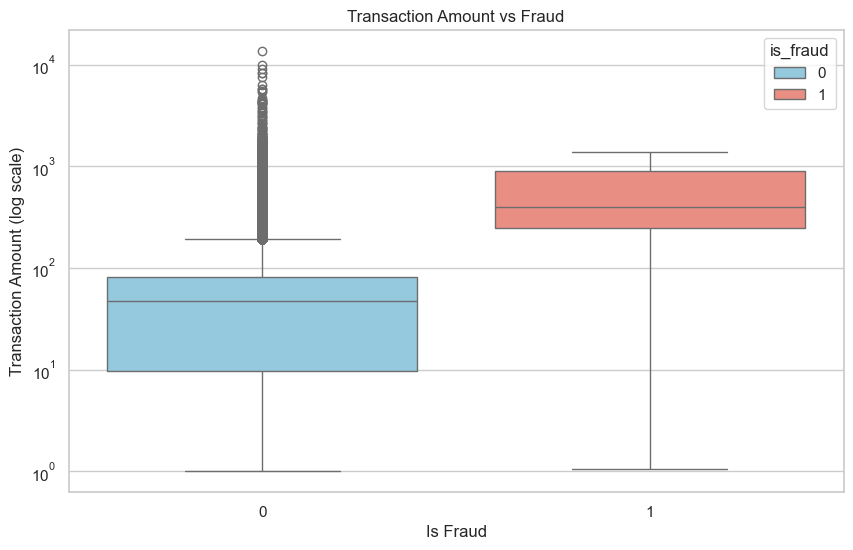

In [42]:

plt.figure(figsize=(10,6))
sns.boxplot(x='is_fraud', y='amt', data=new_df2, palette=['skyblue','salmon'], hue = 'is_fraud')
plt.yscale('log')  # optional: log scale helps if data is highly skewed
plt.title('Transaction Amount vs Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount (log scale)')
plt.show()

#### So we need to remove outliers separately

Since class =  1 does not have any outliers, no need to remove outliers from class = 1.

In [45]:
def remove_outliers_classwise(df, column, target, k=3):
    """
    Removes outliers from `column` separately for each class in `target`
    using the IQR method.
    
    """
    cleaned_df = pd.DataFrame()

    for cls in df[target].unique():
        subset = df[df[target] == cls]
        
        Q1 = subset[column].quantile(0.25)
        Q3 = subset[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        
        # Keep only values within [lower, upper]
        subset_clean = subset[(subset[column] >= lower) & (subset[column] <= upper)]
        
        cleaned_df = pd.concat([cleaned_df, subset_clean], axis=0)

        print(f"Class {cls}: removed {len(subset) - len(subset_clean)} outliers")

    return cleaned_df

when k  = 1.5 it aggressively deletes around 4500 samples from class = 0, so keeping k=3 seems good choice

In [47]:
new_df_cleaned = remove_outliers_classwise(new_df2, column="amt", target="is_fraud", k=3)

Class 0: removed 1778 outliers
Class 1: removed 0 outliers


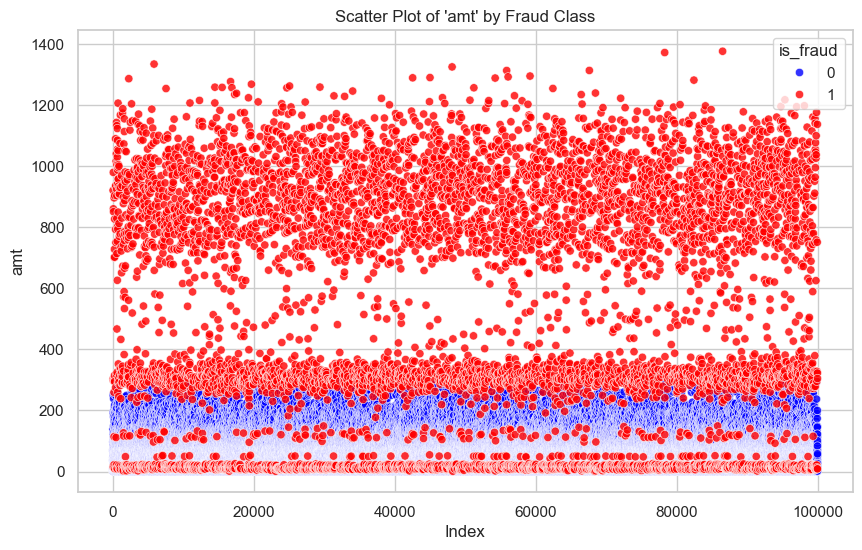

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=new_df_cleaned,
    x=new_df_cleaned.index,
    y='amt',
    hue='is_fraud',
    palette={0: 'blue', 1: 'red'},
    alpha=0.8
)

plt.title("Scatter Plot of 'amt' by Fraud Class")
plt.xlabel('Index')
plt.ylabel('amt')
plt.show()


#### 3. Feature creation

Extracting information from  "trans_date_trans_time" column

In [51]:
from datetime import datetime

# First, convert the column to datetime type
new_df_cleaned['trans_date_trans_time'] = pd.to_datetime(new_df_cleaned['trans_date_trans_time'])

# Extract year, month, day
new_df_cleaned['year'] = new_df_cleaned['trans_date_trans_time'].dt.year
new_df_cleaned['month'] = new_df_cleaned['trans_date_trans_time'].dt.month
new_df_cleaned['day'] = new_df_cleaned['trans_date_trans_time'].dt.day

# Extract hour to categorize time of day
new_df_cleaned['hour'] = new_df_cleaned['trans_date_trans_time'].dt.hour

# Function to map hour to time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'day'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

new_df_cleaned['time_of_day'] = new_df_cleaned['hour'].apply(time_of_day)

# Drop original column 
new_df_cleaned.drop(columns=['trans_date_trans_time', 'hour'], inplace=True)


* **4 new columns were added** by extracting components from the original timestamp:
    * **`year`**: The year of the transaction.
    * **`month`**: The month of the transaction.
    * **`day`**: The day of the month of the transaction.
    * **`time_of_day`**: The hour/time segment of the transaction.
* **The original column `trans_date_trans_time` was deleted** as its information is now fully contained in the new, more granular features.

In [53]:
new_df_cleaned.shape      #previously 14 columns -- 14+4-1 = 17

(98222, 17)

.

Extracting age of the card holder at the time of transaction

In [56]:
new_df_cleaned['dob'] = pd.to_datetime(new_df_cleaned['dob'])

new_df_cleaned['age'] = new_df_cleaned['year'] - new_df_cleaned['dob'].dt.year
new_df_cleaned = new_df_cleaned.drop(columns=['dob'])

From 'dob' column, extracted age of the cardholder, so now 'dob' columnn is not needed. (17-1+1 = =17)

In [58]:
new_df_cleaned.shape

(98222, 17)

Calculate the distance between cardholder's location and the merchant using Haversine formula

In [60]:

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Compute the Haversine distance between two points in kilometers.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Earth radius in kilometers
    R = 6371
    return R * c

# Apply to dataset
new_df_cleaned['distance_km'] = haversine_distance(
    new_df_cleaned['lat'], new_df_cleaned['long'], new_df_cleaned['merch_lat'], new_df_cleaned['merch_long']
)


In [61]:
new_df_cleaned.shape

(98222, 18)

In [62]:
new_df_cleaned.drop(columns = ['lat','long', 'merch_lat', 'merch_long'], inplace = True)

new_df_cleaned.shape

(98222, 14)

#### 4. Encoding categorical columns to Numerical

In [64]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98222 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   merchant     98222 non-null  object 
 1   category     98222 non-null  object 
 2   amt          98222 non-null  float64
 3   gender       98222 non-null  object 
 4   state        98222 non-null  object 
 5   city_pop     98222 non-null  int64  
 6   job          98222 non-null  object 
 7   is_fraud     98222 non-null  int64  
 8   year         98222 non-null  int32  
 9   month        98222 non-null  int32  
 10  day          98222 non-null  int32  
 11  time_of_day  98222 non-null  object 
 12  age          98222 non-null  int32  
 13  distance_km  98222 non-null  float64
dtypes: float64(2), int32(4), int64(2), object(6)
memory usage: 9.7+ MB


In [65]:
object_columns = ["merchant","category", "gender", "state", "job", "time_of_day"]
for col in object_columns:
   print(f"{col} : {new_df_cleaned[col].nunique()}")

merchant : 693
category : 14
gender : 2
state : 51
job : 494
time_of_day : 4


In [66]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Make a copy of the dataset
df_encoded = new_df_cleaned.copy()

# 1️⃣ Frequency encoding for 'merchant' and 'job'
for col in ['merchant', 'job']:
    freq_encoding = df_encoded[col].value_counts()   # absolute counts, not normalized
    df_encoded[col] = df_encoded[col].map(freq_encoding)

# 2️⃣ One-Hot Encoding for 'category', 'state', and 'gender'
df_encoded = pd.get_dummies(df_encoded, columns=['category', 'state', 'gender'], drop_first=True)

# Convert all boolean columns (True/False) to integers (1/0)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# 3️⃣ Ordinal encoding for 'time_of_day' (morning < day < evening < night)
time_mapping = {'morning': 0, 'day': 1, 'evening': 2, 'night': 3}
df_encoded['time_of_day'] = df_encoded['time_of_day'].map(time_mapping)

# ✅ Final check
df_encoded.head()


,merchant,amt,city_pop,job,is_fraud,year,month,day,time_of_day,age,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,gender_M
0,148,7.70,104396,126,0,2020,5,2,2,70,...,0,0,0,1,0,0,0,0,0,1
1,52,1.68,241,175,0,2019,12,16,2,45,...,0,0,0,0,0,0,0,0,0,0
2,174,138.99,765,480,0,2019,12,29,2,47,...,0,0,0,0,0,0,0,0,0,0
3,121,7.03,5216,63,0,2019,6,8,0,26,...,0,0,0,0,0,0,0,1,0,0
4,44,4.70,1577385,279,0,2019,1,1,2,38,...,0,0,0,0,0,0,0,0,0,0


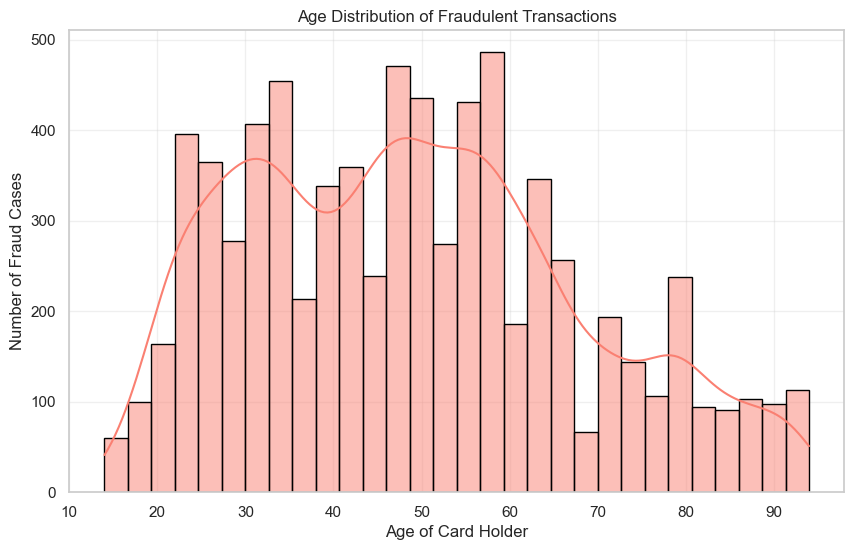

In [67]:

# Filter only fraud cases
fraud_df = df_encoded[df_encoded['is_fraud'] == 1]

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['age'], bins=30, kde=True, color='salmon', edgecolor='black')

plt.title('Age Distribution of Fraudulent Transactions')
plt.xlabel('Age of Card Holder')
plt.ylabel('Number of Fraud Cases')
plt.grid(alpha=0.3)
plt.show()


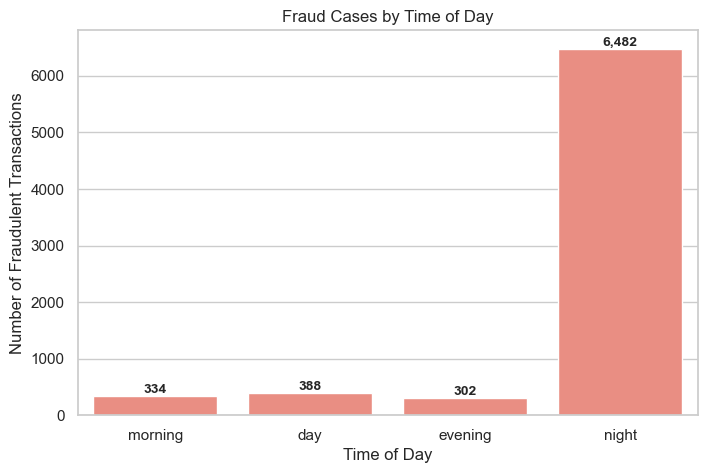

In [68]:

# Map numeric codes back to labels
time_map = {0: 'morning', 1: 'day', 2: 'evening', 3: 'night'}
fraud_df = df_encoded[df_encoded['is_fraud'] == 1].copy()
fraud_df['time_of_day_label'] = fraud_df['time_of_day'].map(time_map)

plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=fraud_df,
    x='time_of_day_label',
    color='salmon',
    order=['morning', 'day', 'evening', 'night']
)

plt.title('Fraud Cases by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraudulent Transactions')

# Add counts on top
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.show()


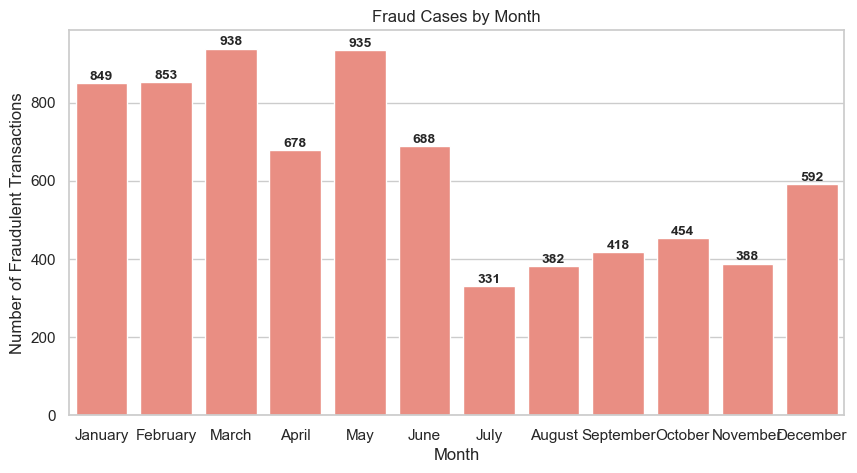

In [69]:
# Filter only fraud cases
fraud_df = df_encoded[df_encoded['is_fraud'] == 1].copy()

# Optional: map month numbers to month names
import calendar
fraud_df['month_label'] = fraud_df['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=fraud_df,
    x='month_label',
    color='salmon',
    order=[calendar.month_name[i] for i in range(1,13)]  # ensures Jan → Dec order
)

plt.title('Fraud Cases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')

# Add counts on top
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.show()

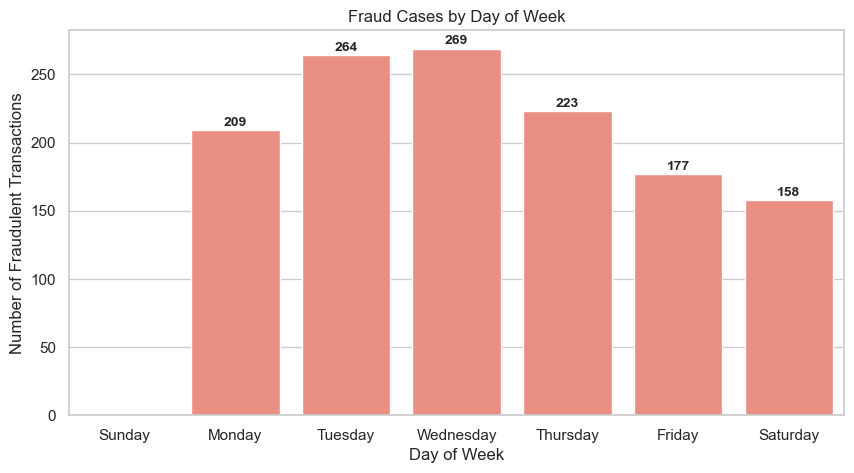

In [70]:

# Filter only fraud cases
fraud_df = df_encoded[df_encoded['is_fraud'] == 1].copy()

# Map numeric codes to day names (adjust if your encoding is different)
day_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
           4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

fraud_df['day_label'] = fraud_df['day'].map(day_map)

plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=fraud_df,
    x='day_label',
    color='salmon',
    order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

plt.title('Fraud Cases by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Fraudulent Transactions')

# Add counts on top
for p in ax.patches:
    height = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 1,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.show()


## Training the model

#### Train test split:

Using stratify to ensure class distribution in train and test is the same as original

In [74]:
X = df_encoded.drop(columns = ["is_fraud"])
y = df_encoded["is_fraud"]

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



print("y_train class distribution:")
print(y_train.value_counts(normalize = True))

print("\ny_test class distribution:")
print(y_test.value_counts(normalize = True))

y_train class distribution:
is_fraud
0    0.923578
1    0.076422
Name: proportion, dtype: float64

y_test class distribution:
is_fraud
0    0.923594
1    0.076406
Name: proportion, dtype: float64


#### Standardize the data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + transform
X_test_scaled = scaler.transform(X_test)         # transform only

#### Train model:

In [79]:
from sklearn.metrics import (
accuracy_score, 
precision_score, 
recall_score, 
f1_score, 
roc_auc_score, 
classification_report, 
confusion_matrix
)

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42,n_jobs=-1)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)

class_weight="balanced"
Automatically adjusts weights to give more importance to the minority class based on dataset distribution

In [83]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     18144
           1       1.00      0.88      0.93      1501

    accuracy                           0.99     19645
   macro avg       0.99      0.94      0.96     19645
weighted avg       0.99      0.99      0.99     19645


Confusion Matrix:
 [[18138     6]
 [  187  1314]]


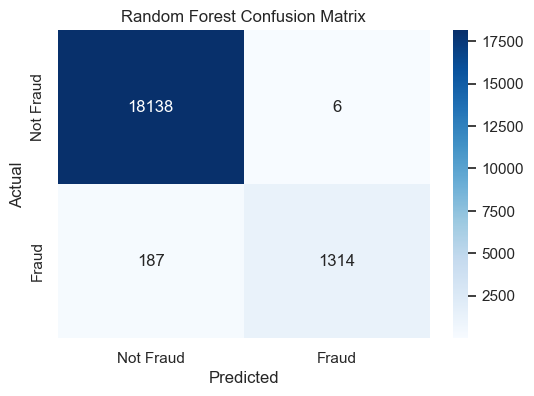

In [84]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

### LGBM

In [86]:
# !pip install lightgbm

In [87]:
from lightgbm import LGBMClassifier 

lgbm = LGBMClassifier(class_weight="balanced", random_state=42, n_jobs=-1) 

lgbm.fit(X_train_scaled, y_train) 

y_pred_lgbm = lgbm.predict(X_test_scaled)

[LightGBM] [Info] Number of positive: 6005, number of negative: 72572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 78577, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [88]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18144
           1       0.85      0.98      0.91      1501

    accuracy                           0.99     19645
   macro avg       0.92      0.98      0.95     19645
weighted avg       0.99      0.99      0.99     19645


Confusion Matrix:
 [[17887   257]
 [   30  1471]]


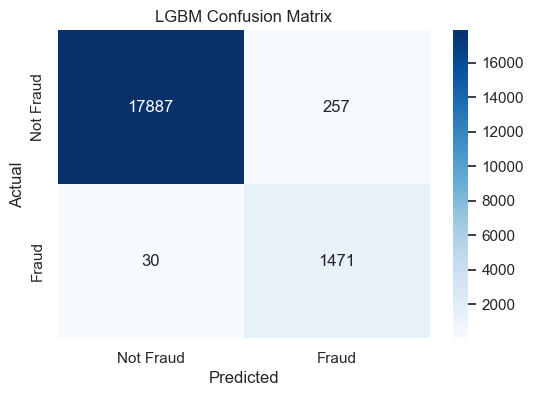

In [89]:
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LGBM Confusion Matrix')
plt.show()

### XGBoost

In [91]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

In [92]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18144
           1       0.90      0.97      0.93      1501

    accuracy                           0.99     19645
   macro avg       0.95      0.98      0.96     19645
weighted avg       0.99      0.99      0.99     19645


Confusion Matrix:
 [[17978   166]
 [   44  1457]]


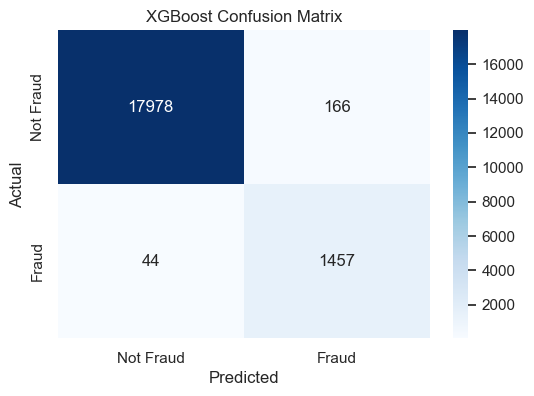

In [93]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

## Applying SMOTE and SMOTETomek

In [95]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter

# ---- SMOTE ----
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))

# ---- SMOTETomek ----
smote_tomek = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smote_tomek.fit_resample(X_train, y_train)
print("After SMOTETomek:", Counter(y_train_smt))


After SMOTE: Counter({0: 72572, 1: 72572})
After SMOTETomek: Counter({0: 72136, 1: 72136})


#### Scaling

In [97]:
# smote
scaler_smote = StandardScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)   # fit + transform
X_test_smote_scaled = scaler_smote.transform(X_test)  

# smotetomek
scaler_smt = StandardScaler()
X_train_smt_scaled = scaler_smt.fit_transform(X_train_smt)   # fit + transform
X_test_smt_scaled = scaler_smt.transform(X_test)  

#### Random Forest

1. SMOTE

In [100]:
rf_smote = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)


rf_smote.fit(X_train_smote_scaled, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_smote_scaled)

In [101]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18144
           1       0.92      0.90      0.91      1501

    accuracy                           0.99     19645
   macro avg       0.96      0.95      0.95     19645
weighted avg       0.99      0.99      0.99     19645


Confusion Matrix:
 [[18030   114]
 [  155  1346]]


2. Smotetomek

In [103]:
rf_smt = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)


rf_smt.fit(X_train_smt_scaled, y_train_smt)
y_pred_rf_smt = rf_smt.predict(X_test_smt_scaled)

In [104]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smt))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18144
           1       0.93      0.90      0.91      1501

    accuracy                           0.99     19645
   macro avg       0.96      0.95      0.95     19645
weighted avg       0.99      0.99      0.99     19645


Confusion Matrix:
 [[18037   107]
 [  151  1350]]


#### LGBM

1. Smote

In [107]:
lgbm_smote = LGBMClassifier(class_weight="balanced", random_state=42, n_jobs=-1) 

lgbm_smote.fit(X_train_smote_scaled, y_train_smote) 

y_pred_lgbm_smote = lgbm_smote.predict(X_test_smote_scaled)

[LightGBM] [Info] Number of positive: 72572, number of negative: 72572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 145144, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [108]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_smote))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18144
           1       0.85      0.93      0.89      1501

    accuracy                           0.98     19645
   macro avg       0.92      0.96      0.94     19645
weighted avg       0.98      0.98      0.98     19645


Confusion Matrix:
 [[17900   244]
 [   98  1403]]


2. Smotetomek

In [110]:
lgbm_smt = LGBMClassifier(class_weight="balanced", random_state=42, n_jobs=-1)


lgbm_smt.fit(X_train_smt_scaled, y_train_smt)
y_pred_lgbm_smt = rf_smt.predict(X_test_smt_scaled)

[LightGBM] [Info] Number of positive: 72136, number of negative: 72136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 144272, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [111]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm_smt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_smt))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18144
           1       0.93      0.90      0.91      1501

    accuracy                           0.99     19645
   macro avg       0.96      0.95      0.95     19645
weighted avg       0.99      0.99      0.99     19645


Confusion Matrix:
 [[18037   107]
 [  151  1350]]


#### XGBoost

1. Smote

In [114]:
from xgboost import XGBClassifier

xgb_smote = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb_smote.fit(X_train_smote_scaled, y_train_smote)

y_pred_xgb_smote = xgb_smote.predict(X_test_smote_scaled)

In [115]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     18144
           1       0.67      0.97      0.79      1501

    accuracy                           0.96     19645
   macro avg       0.83      0.97      0.89     19645
weighted avg       0.97      0.96      0.96     19645


Confusion Matrix:
 [[17426   718]
 [   38  1463]]


2. Smotetomek

In [117]:
from xgboost import XGBClassifier

xgb_smt = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb_smt.fit(X_train_smt_scaled, y_train_smt)

y_pred_xgb_smt = xgb_smt.predict(X_test_smt_scaled)

In [118]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smt))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     18144
           1       0.67      0.97      0.79      1501

    accuracy                           0.96     19645
   macro avg       0.83      0.96      0.88     19645
weighted avg       0.97      0.96      0.96     19645


Confusion Matrix:
 [[17413   731]
 [   46  1455]]


#### Comparing all the 9 models and selecting the best one

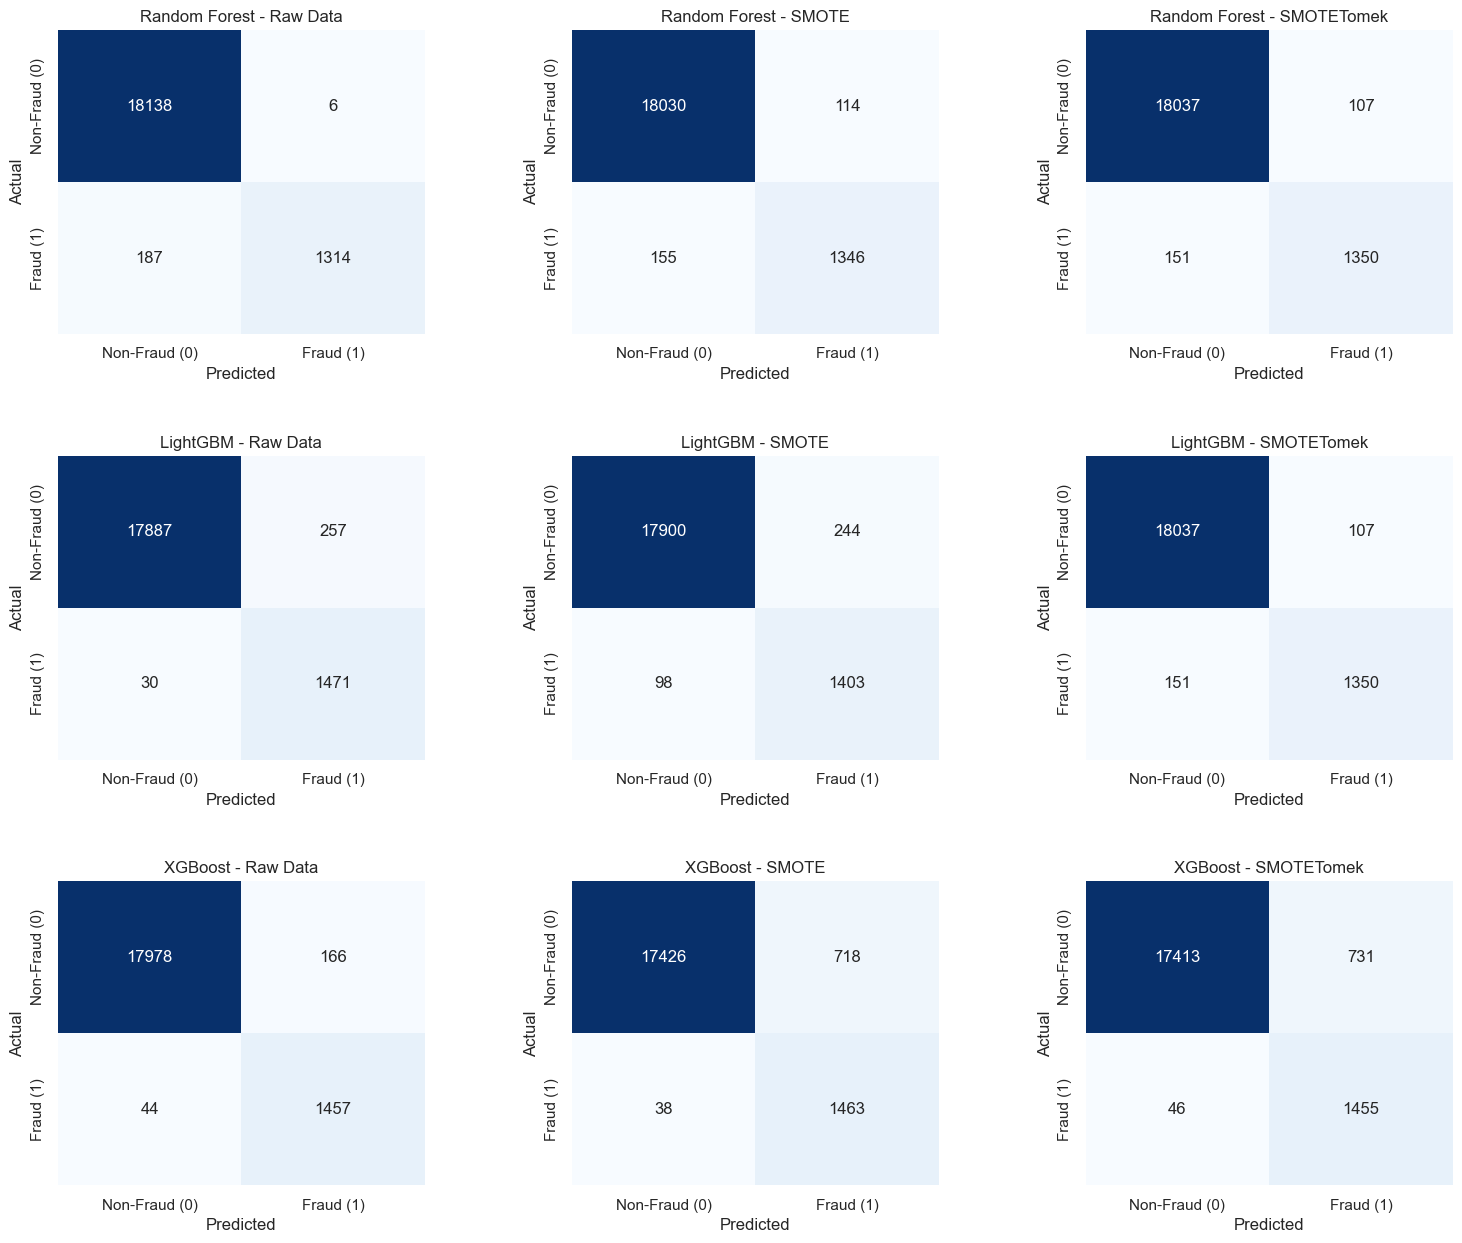

In [120]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define model names and predictions
models = [
    ("Random Forest", [y_pred_rf, y_pred_rf_smote, y_pred_rf_smt]),
    ("LightGBM",      [y_pred_lgbm, y_pred_lgbm_smote, y_pred_lgbm_smt]),
    ("XGBoost",       [y_pred_xgb, y_pred_xgb_smote, y_pred_xgb_smt])
]

titles = ["Raw Data", "SMOTE", "SMOTETomek"]

# Loop through models and predictions
for i, (model_name, preds) in enumerate(models):
    for j, y_pred in enumerate(preds):
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(
            cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Fraud (0)", "Fraud (1)"],
            yticklabels=["Non-Fraud (0)", "Fraud (1)"],
            ax=axes[i, j]
        )
        axes[i, j].set_title(f"{model_name} - {titles[j]}")
        axes[i, j].set_xlabel("Predicted")
        axes[i, j].set_ylabel("Actual")

plt.show()


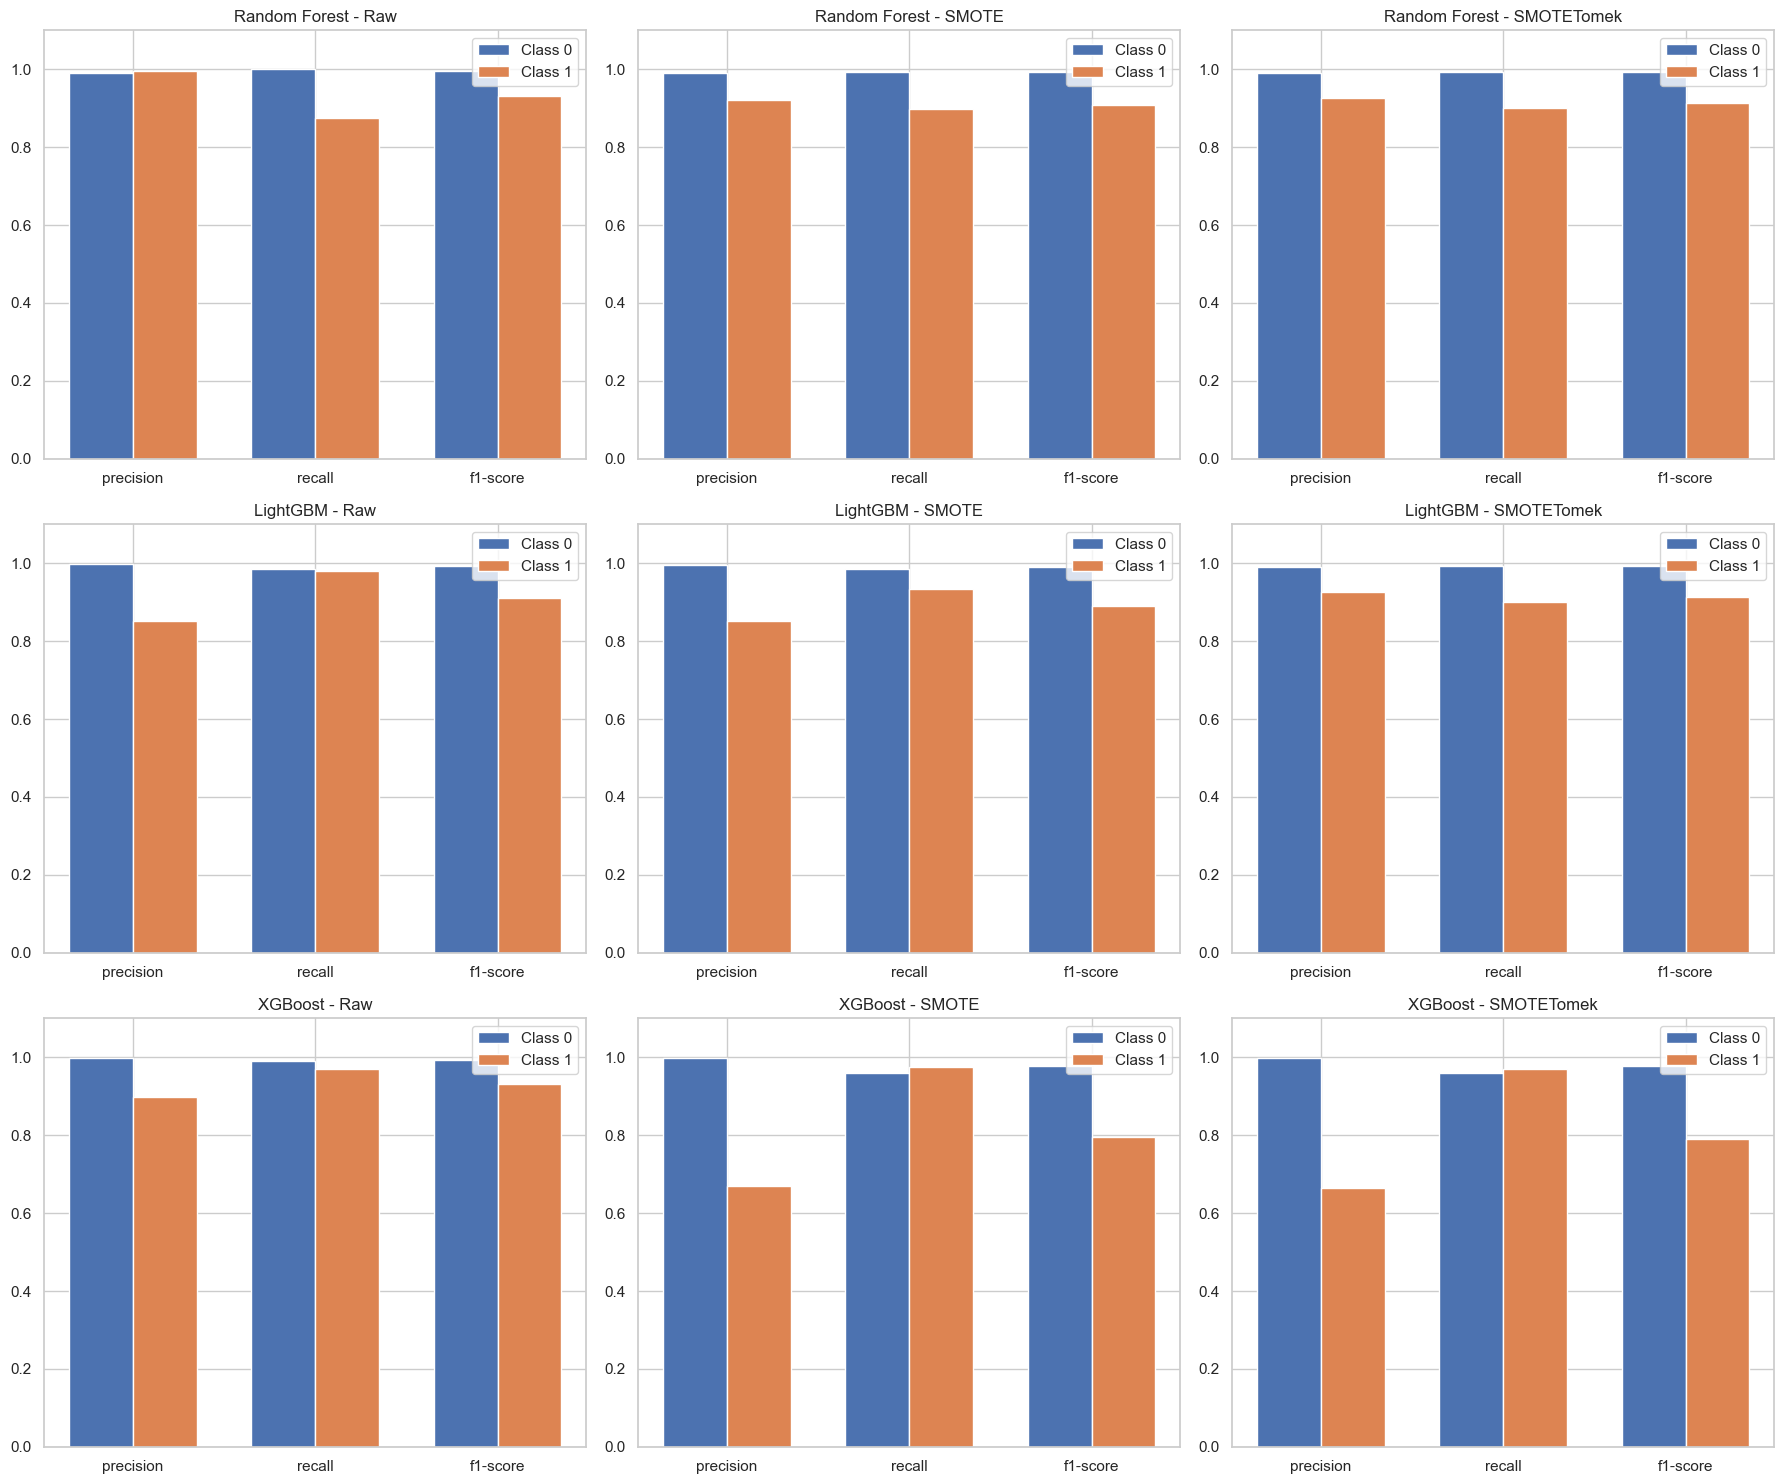

In [121]:

# Store y_pred for all models
model_preds = {
    "Random Forest": {
        "Raw": y_pred_rf,
        "SMOTE": y_pred_rf_smote,
        "SMOTETomek": y_pred_rf_smt
    },
    "LightGBM": {
        "Raw": y_pred_lgbm,
        "SMOTE": y_pred_lgbm_smote,
        "SMOTETomek": y_pred_lgbm_smt
    },
    "XGBoost": {
        "Raw": y_pred_xgb,
        "SMOTE": y_pred_xgb_smote,
        "SMOTETomek": y_pred_xgb_smt
    }
}

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.subplots_adjust(hspace=0.4)

# loop through models and datasets
for row_idx, (model_name, datasets) in enumerate(model_preds.items()):
    for col_idx, (data_type, y_pred) in enumerate(datasets.items()):
        
        # classification report
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        
        metrics = ['precision', 'recall', 'f1-score']
        classes = ['0', '1']
        
        # values
        values = []
        for cls in classes:
            values.append([report[cls][metric] for metric in metrics])
        
        values = np.array(values)
        x = np.arange(len(metrics))  
        width = 0.35  
        
        ax = axes[row_idx, col_idx]
        
        # plot bars for each class
        ax.bar(x - width/2, values[0], width, label='Class 0')
        ax.bar(x + width/2, values[1], width, label='Class 1')
        
        ax.set_ylim(0, 1.1)
        ax.set_xticks(x)
        ax.set_xticklabels(metrics)
        ax.set_title(f"{model_name} - {data_type}")
        ax.legend()

plt.tight_layout()
plt.show()


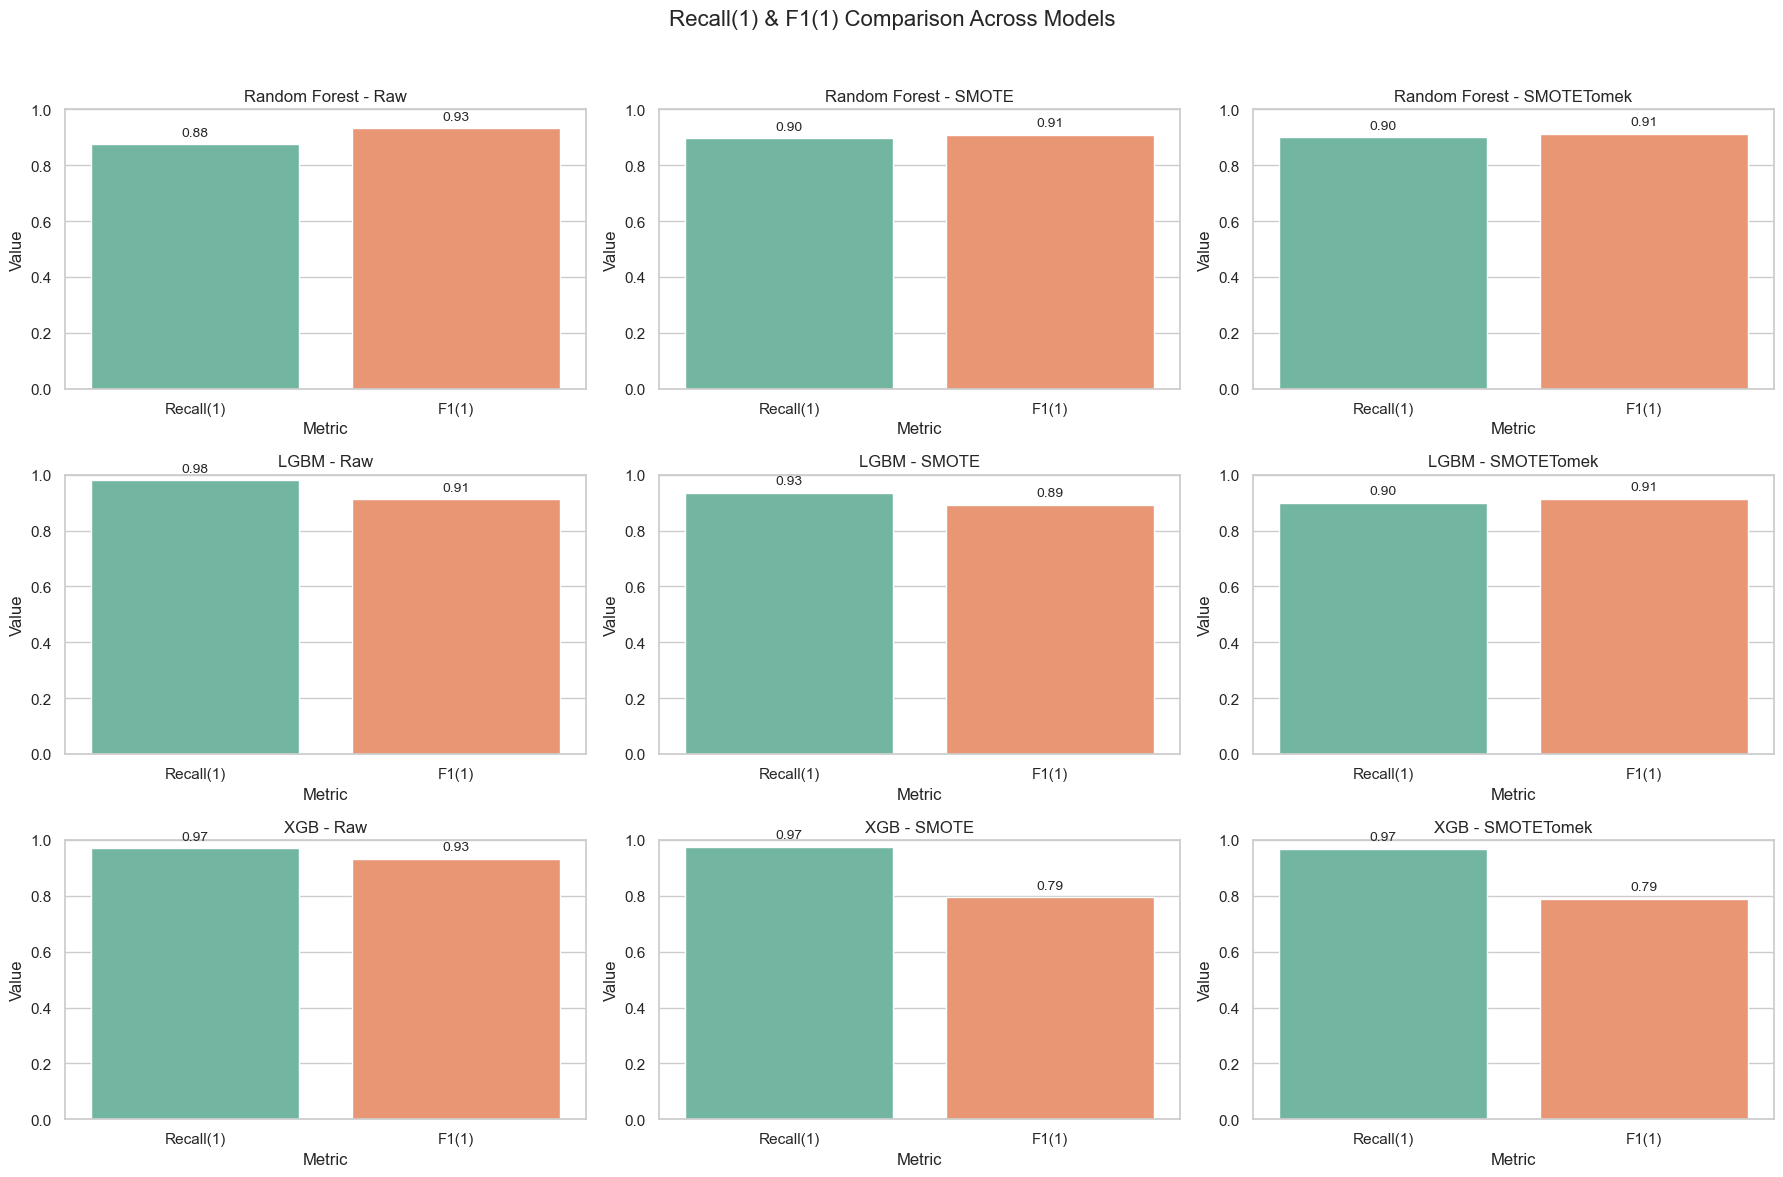

In [122]:

# Define model names and predictions in the same layout as confusion matrices
models = [
    ("Random Forest - Raw", y_test, y_pred_rf),
    ("Random Forest - SMOTE", y_test, y_pred_rf_smote),
    ("Random Forest - SMOTETomek", y_test, y_pred_rf_smt),
    ("LGBM - Raw", y_test, y_pred_lgbm),
    ("LGBM - SMOTE", y_test, y_pred_lgbm_smote),
    ("LGBM - SMOTETomek", y_test, y_pred_lgbm_smt),
    ("XGB - Raw", y_test, y_pred_xgb),
    ("XGB - SMOTE", y_test, y_pred_xgb_smote),
    ("XGB - SMOTETomek", y_test, y_pred_xgb_smt),
]

# Collect recall(1) and f1-score(1) for each model
metrics_data = []
for name, y_true, y_pred in models:
    report = classification_report(y_true, y_pred, output_dict=True)
    recall_1 = report["1"]["recall"]
    f1_1 = report["1"]["f1-score"]
    metrics_data.append({"Model": name, "Recall(1)": recall_1, "F1(1)": f1_1})

metrics_df = pd.DataFrame(metrics_data)

# Plot in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Recall(1) & F1(1) Comparison Across Models", fontsize=16)

for ax, (idx, row) in zip(axes.flatten(), metrics_df.iterrows()):
    data = pd.DataFrame({
        "Metric": ["Recall(1)", "F1(1)"],
        "Value": [row["Recall(1)"], row["F1(1)"]]
    })
    
    sns.barplot(
        data=data,
        x="Metric",
        y="Value",
        hue="Metric",          # use Metric as hue
        palette="Set2",
        dodge=False,           # bars side-by-side not needed
        legend=False,          # hide redundant legends
        ax=ax
    )
    
    ax.set_ylim(0, 1)
    ax.set_title(row["Model"], fontsize=12)
    
    # Annotate values on top of bars
    for i, val in enumerate(data["Value"]):
        ax.text(i, val + 0.02, f"{val:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### So the best model in my opinion is LGBM-RAW i.e LGBM model trained on the raw data. So choosing this model

### SHAP value and Feature Importance

In [125]:
feature_groups = {
    "merchant": ["merchant"],
    "category": [col for col in X_train.columns if col.startswith("category_")],
    "amt": ["amt"],
    "gender": [col for col in X_train.columns if col.startswith("gender_")],  # <- fixed
    "state": [col for col in X_train.columns if col.startswith("state_")],
    "city_pop": ["city_pop"],
    "job": ["job"],
    "year": ["year"],
    "month": ["month"],
    "day": ["day"],
    "time_of_day": ["time_of_day"],
    "age": ["age"],
    "distance_km": ["distance_km"]
}


In [126]:
# !pip install shap

In [127]:
import shap

# Initialize explainer
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_train_scaled)

# For classification, shap_values is a list [class0, class1]
# Usually we care about fraud (class 1)
shap_class1 = shap_values


C:\Users\himal shah\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [128]:
group_importance = {}
for group, cols in feature_groups.items():
    idxs = [X_train.columns.get_loc(c) for c in cols]
    group_importance[group] = np.abs(shap_class1[:, idxs]).mean()

group_importance_df = pd.DataFrame(
    sorted(group_importance.items(), key=lambda x: x[1], reverse=True),
    columns=["Feature Group", "Mean |SHAP| Value"]
)
print(group_importance_df)


   Feature Group  Mean |SHAP| Value
0            amt           2.103265
1    time_of_day           0.433317
2       city_pop           0.226793
3            age           0.167089
4          month           0.131298
5            job           0.128078
6       category           0.121850
7            day           0.106380
8       merchant           0.099653
9         gender           0.067237
10   distance_km           0.050369
11          year           0.019292
12         state           0.003820


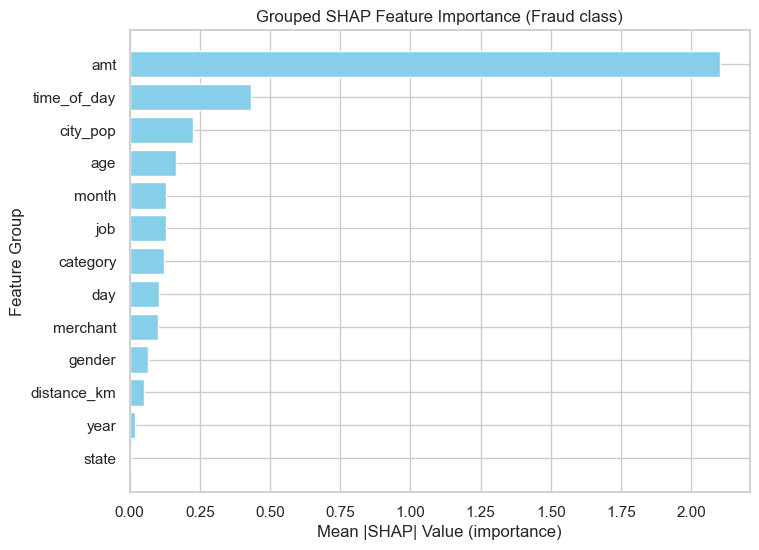

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(group_importance_df["Feature Group"], group_importance_df["Mean |SHAP| Value"], color="skyblue")
plt.xlabel("Mean |SHAP| Value (importance)")
plt.ylabel("Feature Group")
plt.title("Grouped SHAP Feature Importance (Fraud class)")
plt.gca().invert_yaxis()
plt.show()


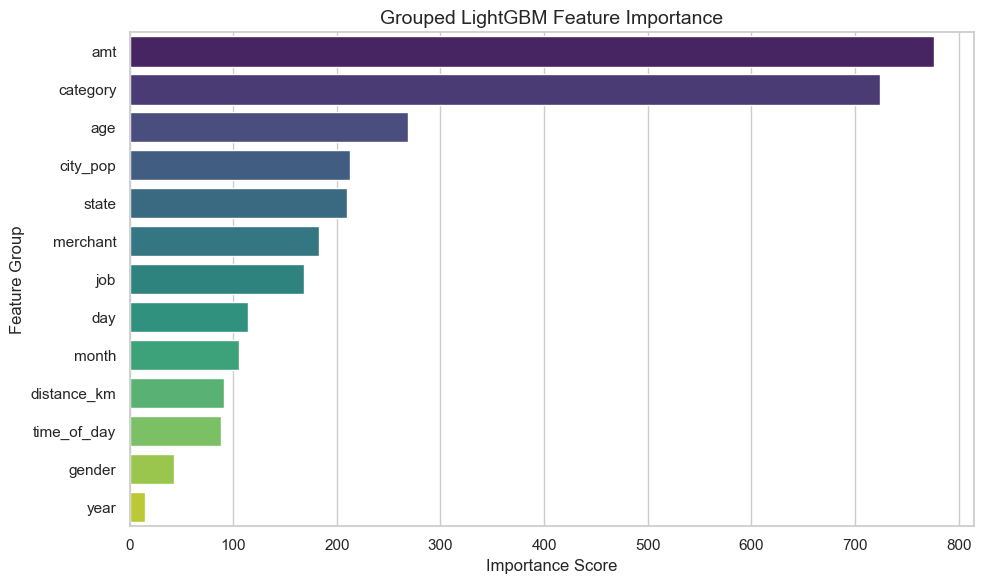

In [130]:

# --- Aggregate LightGBM feature importance by feature group ---
group_importance_lgbm = {}
for group, cols in feature_groups.items():
    # Only include columns that exist in X_train
    idxs = [X_train.columns.get_loc(c) for c in cols if c in X_train.columns]
    # Sum the importances of all columns in this group
    group_importance_lgbm[group] = lgbm.feature_importances_[idxs].sum()

# --- Convert to DataFrame and sort ---
group_importance_lgbm_df = pd.DataFrame(
    list(group_importance_lgbm.items()), 
    columns=["Feature Group", "Importance"]
).sort_values(by="Importance", ascending=False)

# --- Plot grouped feature importance ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=group_importance_lgbm_df,
    x="Importance", y="Feature Group", hue="Feature Group", palette="viridis", legend=False
)
plt.title("Grouped LightGBM Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()


### Logging to MLFlow

In [132]:
# !pip install mlflow

In [254]:
import os
print(os.getcwd())


C:\Users\himal shah\Machine Learning\AI intern\Credit Card Fraud Detection


In [264]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm


mlflow.set_tracking_uri("http://127.0.0.1:5000/")


# Create (or select) an experiment
mlflow.set_experiment("Fraud Detection Experiments")

2025/10/09 16:55:36 INFO mlflow.tracking.fluent: Experiment with name 'Fraud Detection Experiments' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/818353765243733778', creation_time=1760008236274, experiment_id='818353765243733778', last_update_time=1760008236274, lifecycle_stage='active', name='Fraud Detection Experiments', tags={}>

In [272]:
# Function to log models
def log_model_results(model_name, y_test, y_pred, model, X_test):
    """
    Logs a trained model, its metrics (class-wise), and parameters to MLflow with proper input_example.
    """
    # Overall metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Class-wise metrics
    precision_per_class = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, zero_division=0)

    # Combine metrics into a dictionary
    metrics = {
        "accuracy": accuracy,
        "roc_auc": roc_auc,
        "precision_class_0": precision_per_class[0],
        "precision_class_1": precision_per_class[1],
        "recall_class_0": recall_per_class[0],
        "recall_class_1": recall_per_class[1],
        "f1_class_0": f1_per_class[0],
        "f1_class_1": f1_per_class[1],
    }

    # Start MLflow run
    with mlflow.start_run(run_name=model_name):
        # Log parameters (default)
        mlflow.log_param("model_type", model_name)
        mlflow.log_param("params_used", "default")

        # Log metrics
        mlflow.log_metrics(metrics)

        # Use first few rows of X_test as input example
        input_example = X_test[:5]  # NumPy array to avoid feature name mismatch warning

        # Log model
        if model_name.lower().startswith("random"):
            mlflow.sklearn.log_model(model, name="model", input_example=input_example)
        elif model_name.lower().startswith("lgbm"):
            mlflow.lightgbm.log_model(model, name="model", input_example=input_example)
        elif model_name.lower().startswith("xgb"):
            mlflow.xgboost.log_model(model, name="model", input_example=input_example)

        print(f"✅ Logged {model_name} to MLflow successfully.")

In [274]:
# 9 models to log
models_to_log = [
    ("Random Forest - Raw", y_test, y_pred_rf, rf),
    ("Random Forest - SMOTE", y_test, y_pred_rf_smote, rf_smote),
    ("Random Forest - SMOTETomek", y_test, y_pred_rf_smt, rf_smt),
    ("LGBM - Raw", y_test, y_pred_lgbm, lgbm),
    ("LGBM - SMOTE", y_test, y_pred_lgbm_smote, lgbm_smote),
    ("LGBM - SMOTETomek", y_test, y_pred_lgbm_smt, lgbm_smt),
    ("XGB - Raw", y_test, y_pred_xgb, xgb),
    ("XGB - SMOTE", y_test, y_pred_xgb_smote, xgb_smote),
    ("XGB - SMOTETomek", y_test, y_pred_xgb_smt, xgb_smt),
]

In [276]:
# Log all 9 models
for name, y_t, y_p, model in models_to_log:
    log_model_results(name, y_t, y_p, model, X_test_scaled)

✅ Logged Random Forest - Raw to MLflow successfully.
🏃 View run Random Forest - Raw at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/3fff2dd44601457f9b629a60b8378b66
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


✅ Logged Random Forest - SMOTE to MLflow successfully.
🏃 View run Random Forest - SMOTE at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/c7fc980351ef4e2bb5c52e9691177bcb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


✅ Logged Random Forest - SMOTETomek to MLflow successfully.
🏃 View run Random Forest - SMOTETomek at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/6be6b6f7c0994d47bea5390881d925ce
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


✅ Logged LGBM - Raw to MLflow successfully.
🏃 View run LGBM - Raw at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/5d975ea16e654de99748b09c96b126ff
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


✅ Logged LGBM - SMOTE to MLflow successfully.
🏃 View run LGBM - SMOTE at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/fc0d0422148d4e9bb26f097ae4064a9b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


✅ Logged LGBM - SMOTETomek to MLflow successfully.
🏃 View run LGBM - SMOTETomek at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/6734d70ab96544eda528203b4e0c4dc3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


C:\Users\himal shah\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [17:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


✅ Logged XGB - Raw to MLflow successfully.
🏃 View run XGB - Raw at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/648413df89df4ad1a277f5707ea4df46
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


C:\Users\himal shah\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [17:05:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


✅ Logged XGB - SMOTE to MLflow successfully.
🏃 View run XGB - SMOTE at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/79b217c081204175810f2f04588f2250
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778


C:\Users\himal shah\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [17:05:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


✅ Logged XGB - SMOTETomek to MLflow successfully.
🏃 View run XGB - SMOTETomek at: http://127.0.0.1:5000/#/experiments/818353765243733778/runs/337be7ff851648a38bba549985a97e31
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818353765243733778
